In [9]:
# Homework 2 Part 1 (due 7/07/2024)
# Arnav Singh

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test. 

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [11]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


R2 0.03530218264671636
t stat: 4.012651743018029
[304.18307453]


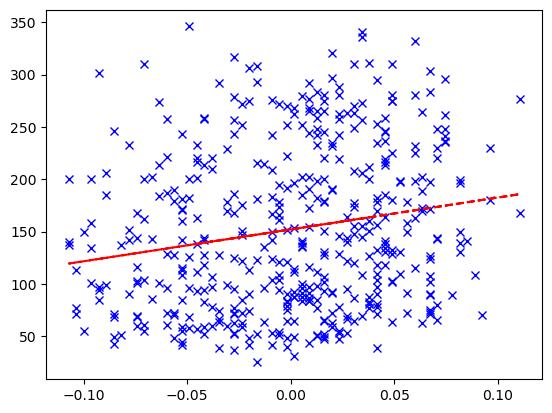

In [12]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# select first variable
var_name1 = var_names[0]

# select data associated with the first variable
x1 = X[var_name1] #there was typo here 

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

# get residuals
resid = yHat-y

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

#Step 1 T-test also included cause it said in the directions above
t1_stat = model.coef_[0] / (np.sqrt(np.sum((resid**2/(len(y) - 2)))))
print('t stat:', t1_stat)
# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yHat, ls='--', color='red')

#also wanted to check model coeff
print(model.coef_)

### Step 2: Fitting Linear models for each independent variable
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

  Variable           RSS          MSE        RSE       R^2  t-statistic  \
0      age  2.528482e+06  5720.547017  75.805999  0.035302     4.012652   
1      sex  2.616149e+06  5918.888900  77.108968  0.001854     0.904115   
2      bmi  1.719582e+06  3890.456585  62.515122  0.343924    15.187290   
3       bp  2.110158e+06  4774.113902  69.251819  0.194906    10.320859   
4       s1  2.503186e+06  5663.315624  75.425844  0.044954     4.550886   
5       s2  2.541607e+06  5750.241103  76.002491  0.030295     3.707571   
6       s3  2.212502e+06  5005.661621  70.911315  0.155859    -9.013305   
7       s4  2.135363e+06  4831.138386  69.664181  0.185290    10.003463   
8       s5  1.781701e+06  4030.998723  63.634279  0.320223    14.396916   
9       s6  2.237572e+06  5062.380595  71.311930  0.146294     8.683299   

                model  
0  LinearRegression()  
1  LinearRegression()  
2  LinearRegression()  
3  LinearRegression()  
4  LinearRegression()  
5  LinearRegression()  
6  Lin

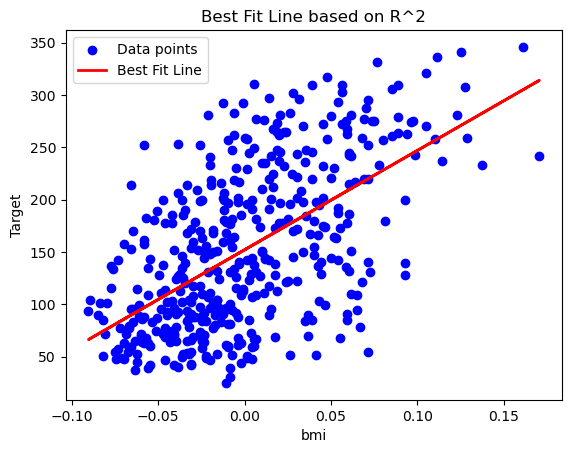

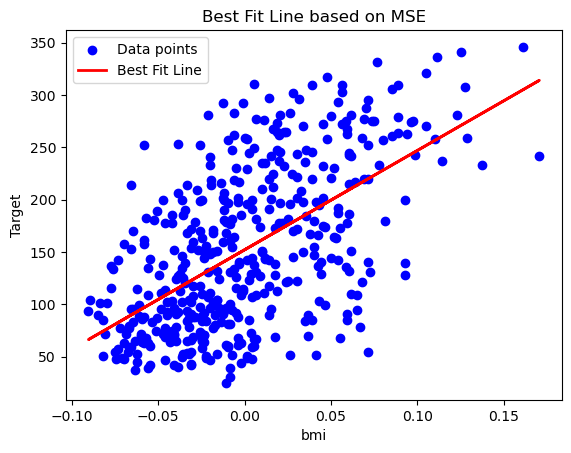

In [13]:
def univariate_regression_analysis(data, target):
    target_array = target.to_numpy()
    n = len(target_array)
    dof_residual = n - 2  # Degrees of freedom for residuals

    results = []

    for col_name, col_data in data.items():
        col_data_array = col_data.to_numpy().reshape(-1, 1)

        # Fit linear model
        model = LinearRegression().fit(col_data_array, target_array)

        # Make predictions
        predictions = model.predict(col_data_array)

        # Calculate residuals
        residuals = target_array - predictions

        # Calculate metrics
        rss = np.sum(residuals ** 2)
        mse = mean_squared_error(target_array, predictions)
        rse = np.sqrt(rss / dof_residual)
        r2 = model.score(col_data_array, target_array)
        
        # Calculate standard error for the coefficient
        X_with_intercept = np.hstack((np.ones((n, 1)), col_data_array))
        XTX_inv = np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept))
        variance_estimate = rss / dof_residual
        std_error = np.sqrt(variance_estimate * XTX_inv[1, 1])

        # Calculate t-statistic for the coefficient
        t_stat = model.coef_[0] / std_error

        # Storing the results into a dictionary
        results.append({
            'Variable': col_name,
            'RSS': rss,
            'MSE': mse,
            'RSE': rse,
            'R^2': r2,
            't-statistic': t_stat,
            'model': model  # Store model to use later for plotting
        })

    # Convert results to a DataFrame so that it is nice to print
    results_df = pd.DataFrame(results)

    return results_df

# Perform univariate regression analysis
diabetes_uni_results = univariate_regression_analysis(X, y)

# Print the results in a table format
print(diabetes_uni_results)

def display_optimal_fit(data, target, results, evaluation_metric='R^2'):
    optimal_metric_value = -float('inf') if evaluation_metric == 'R^2' else float('inf')  # Initialize based on whether higher or lower is better

    optimal_model_name = None
    optimal_model = None
    optimal_x = None

    for _, result in results.iterrows():
        current_metric_value = result[evaluation_metric]

        # Determine if the current model is better based on the evaluation metric
        if (evaluation_metric == 'R^2' and current_metric_value > optimal_metric_value) or (evaluation_metric in ['MSE', 'RSE'] and current_metric_value < optimal_metric_value):
            optimal_metric_value = current_metric_value
            optimal_model_name = result['Variable']
            optimal_model = result['model']
            optimal_x = data[optimal_model_name].to_numpy()

    if optimal_model_name:
        # Generate predictions from the optimal model
        predictions = optimal_model.predict(optimal_x.reshape(-1, 1))
        
        # Plotting the data points and the best-fit line
        plt.scatter(optimal_x, target, color='blue', label='Data points')
        plt.plot(optimal_x, predictions, color='red', linewidth=2, label='Best Fit Line')
        plt.xlabel(optimal_model_name)
        plt.ylabel('Target')
        plt.title(f'Best Fit Line based on {evaluation_metric}')
        plt.legend()
        plt.show()

    return optimal_model_name, optimal_model

# Evaluate diabetes model results using R² and MSE
best_model_name_r2, best_model_r2 = display_optimal_fit(X, y, diabetes_uni_results, evaluation_metric='R^2')
best_model_name_mse, best_model_mse = display_optimal_fit(X, y, diabetes_uni_results, evaluation_metric='MSE')


### Step 3: Mulitvariate Regression Model for each independent variable
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

In [14]:
def multivariate_lm(X, y):
    # Fit multivariate linear regression model
    model = LinearRegression().fit(X, y)
    # Get model predictions
    y_pred = model.predict(X)
    # Number of observations (n) and number of predictors (p)
    n, p = X.shape
    # Residual sum of squares (RSS)
    rss = np.sum((y - y_pred)**2)
    # Mean squared error (MSE)
    mse = mean_squared_error(y, y_pred)
    # Residual standard error (RSE)
    rse = np.sqrt(rss / (n - p - 1))
    # R-squared (R^2)
    r2 = model.score(X, y)
    # F-statistic
    y_mean = np.mean(y)  # Mean of y
    tss = np.sum((y - y_mean)**2)  # Total sum of squares (TSS)
    f_statistic = ((tss - rss) / p) / (rss / (n - p - 1))  # F-statistic formula
    # Return results as a dictionary
    results = {
        'model': model,
        'rss': rss,
        'mse': mse,
        'rse': rse,
        'r2': r2,
        'f_statistic': f_statistic
    }
    return results
# Assuming X and y are already defined
diabetes_multi_results = multivariate_lm(X, y)
# Print results
print("Multivariate Linear Regression for the Data")
print(f"RSS: {diabetes_multi_results['rss']}")
print(f"MSE: {diabetes_multi_results['mse']}")
print(f"RSE: {diabetes_multi_results['rse']}")
print(f"R-squared: {diabetes_multi_results['r2']}")
print(f"F-statistic: {diabetes_multi_results['f_statistic']}")

Multivariate Linear Regression for the Data
RSS: 1263985.7856333437
MSE: 2859.6963475867506
RSE: 54.15423932805569
R-squared: 0.5177484222203498
F-statistic: 46.27243958524319


### Step 4: Work
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

In [15]:
def calculate_f_statistic(X, y):
    n, p = X.shape
    f_stats = {}

    # Fit the complete model with all predictors
    full_model = LinearRegression().fit(X, y)
    y_pred_full = full_model.predict(X)
    RSS_full = np.sum((y - y_pred_full)**2)
    DF_full = n - p - 1

    # Fit models with one predictor at a time
    for col in X.columns:
        X_reduced = X[[col]]
        reduced_model = LinearRegression().fit(X_reduced, y)
        y_pred_reduced = reduced_model.predict(X_reduced)
        RSS_reduced = np.sum((y - y_pred_reduced)**2)
        DF_reduced = n - 2

        # Compute F-statistic
        F_stat = ((RSS_reduced - RSS_full) / (DF_reduced - DF_full)) / (RSS_full / DF_full)
        f_stats[col] = F_stat

    return f_stats

# Assuming diabetes_uni_results is a pandas DataFrame containing results
# Calculate F-statistics for each variable
f_stat_results = calculate_f_statistic(X, y)

# Rank variables by F-statistic
f_stat_rankings = sorted(f_stat_results, key=f_stat_results.get, reverse=True)

# Sort diabetes_uni_results based on R-squared values
r2_rankings = diabetes_uni_results.sort_values(by='R^2', ascending=False).index.tolist()

# Print rankings
print("Rankings Based on F-statistic:")
for rank, variable in enumerate(f_stat_rankings, start=1):
    print(f"{rank}. {variable}: F-statistic = {f_stat_results[variable]}")

print("\nRankings Based on R-squared:")
for rank, variable in enumerate(r2_rankings, start=1):
    r2_value = diabetes_uni_results.loc[variable, 'R^2']
    print(f"{rank}. {diabetes_uni_results.loc[variable, 'Variable']}: R-squared = {r2_value}")
# Compare top 3 variables
top_3_f_stat = f_stat_rankings[:3]
top_3_r2 = r2_rankings[:3]

print("\nTop 3 Variables Based on F-statistic:", top_3_f_stat)
print("Top 3 Variables Based on R-squared:", top_3_r2)

Rankings Based on F-statistic:
1. sex: F-statistic = 51.22968119885858
2. s2: F-statistic = 48.40548078530416
3. age: F-statistic = 47.908219332691466
4. s1: F-statistic = 46.949814135238775
5. s6: F-statistic = 36.88646916926492
6. s3: F-statistic = 35.936645025535206
7. s4: F-statistic = 33.01405368752383
8. bp: F-statistic = 32.05911342484217
9. s5: F-statistic = 19.614799081454663
10. bmi: F-statistic = 17.261260113967484

Rankings Based on R-squared:
1. bmi: R-squared = 0.3439237602253802
2. s5: R-squared = 0.3202231084297208
3. bp: R-squared = 0.1949061431435003
4. s4: R-squared = 0.18528968598509687
5. s3: R-squared = 0.15585855244530533
6. s6: R-squared = 0.14629361572293476
7. s1: R-squared = 0.04495353245556555
8. age: R-squared = 0.03530218264671636
9. s2: R-squared = 0.030294651136685613
10. sex: R-squared = 0.0018543357106460823

Top 3 Variables Based on F-statistic: ['sex', 's2', 'age']
Top 3 Variables Based on R-squared: [2, 8, 3]


### Step 4: Answer
The F-statistic evaluates the information content of each variable within the multivariate model, considering shared variance and multicollinearity among variables. In contrast, R-squared values reflect the fit of each variable in isolation, not accounting for other variables. As a result, variables with high individual R-squared values may not necessarily have high F-statistics when other variables are included in the model. The three variables with the highest f_reduced statistics are BMI with value of 230, s5 with value of 206, and blood pressure with value of 106. Additionally, these same variables also have the three lowest r-squared values, as the f_reduced is the highest. This alignment makes sense because both f_reduced and r-squared are indicators of potential correlation between variables in a dataset.

### Step 5: Redoing things
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test. 

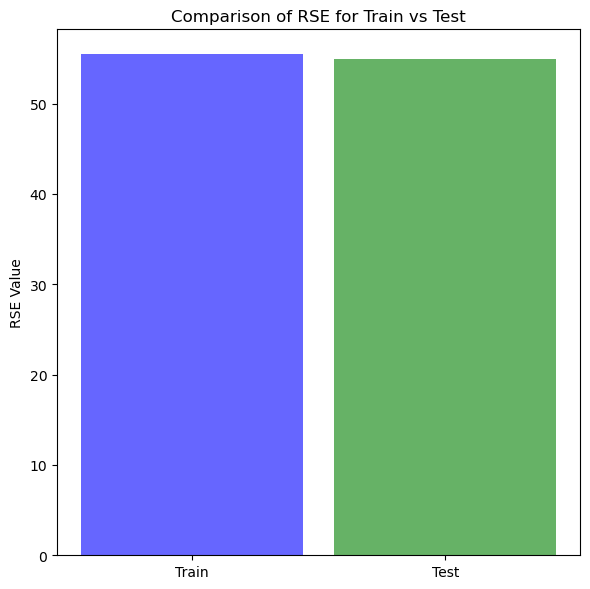

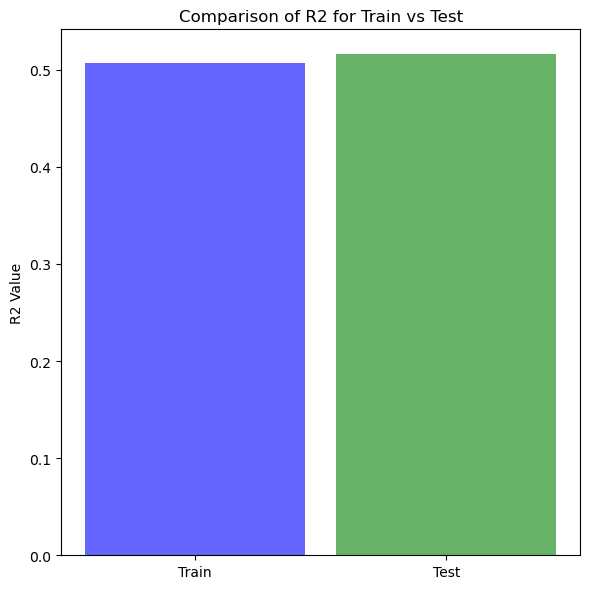

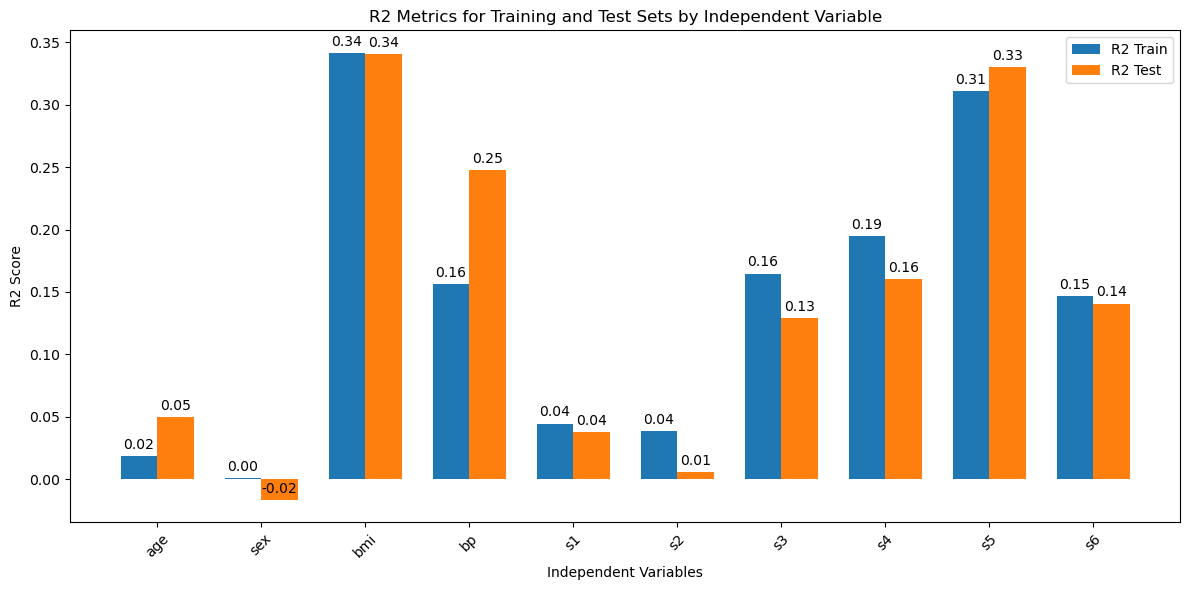

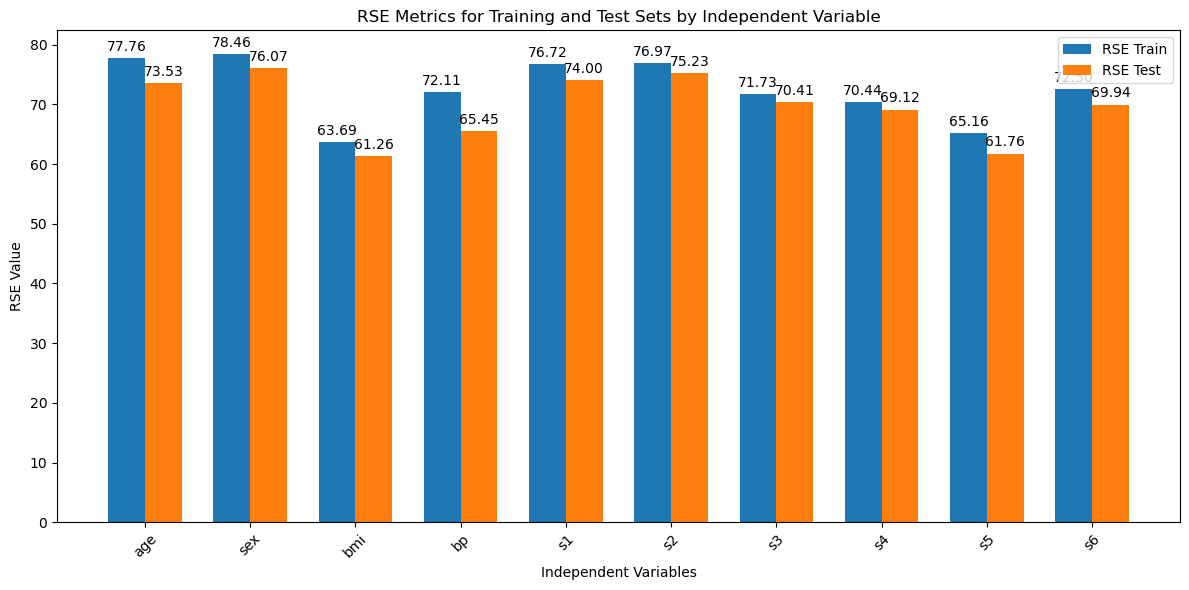

Feature: age
Training RSE: 77.76, Test RSE: 73.53
Training R2: 0.02, Test R2: 0.05

Feature: sex
Training RSE: 78.46, Test RSE: 76.07
Training R2: 0.00, Test R2: -0.02

Feature: bmi
Training RSE: 63.69, Test RSE: 61.26
Training R2: 0.34, Test R2: 0.34

Feature: bp
Training RSE: 72.11, Test RSE: 65.45
Training R2: 0.16, Test R2: 0.25

Feature: s1
Training RSE: 76.72, Test RSE: 74.00
Training R2: 0.04, Test R2: 0.04

Feature: s2
Training RSE: 76.97, Test RSE: 75.23
Training R2: 0.04, Test R2: 0.01

Feature: s3
Training RSE: 71.73, Test RSE: 70.41
Training R2: 0.16, Test R2: 0.13

Feature: s4
Training RSE: 70.44, Test RSE: 69.12
Training R2: 0.19, Test R2: 0.16

Feature: s5
Training RSE: 65.16, Test RSE: 61.76
Training R2: 0.31, Test R2: 0.33

Feature: s6
Training RSE: 72.50, Test RSE: 69.94
Training R2: 0.15, Test R2: 0.14


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def calculate_metrics(y_true, y_pred, n, p):
    rss = np.sum((y_true - y_pred)**2)
    mse = mean_squared_error(y_true, y_pred)
    rse = np.sqrt(rss / (n - p - 1))
    r2 = 1 - (rss / np.sum((y_true - np.mean(y_true))**2))
    return rss, mse, rse, r2

def univariate_lm(data, target, test_size=0.4, random_state=23):
    y = target.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=test_size, random_state=random_state)

    results_train, results_test = {}, {}

    for col in data.columns:
        X_train_col, X_test_col = X_train[[col]].values, X_test[[col]].values

        model = LinearRegression().fit(X_train_col, y_train)
        y_train_pred = model.predict(X_train_col)
        y_test_pred = model.predict(X_test_col)

        train_metrics = calculate_metrics(y_train, y_train_pred, len(y_train), 1)
        test_metrics = calculate_metrics(y_test, y_test_pred, len(y_test), 1)

        results_train[col] = {'model': model, 'rss': train_metrics[0], 'mse': train_metrics[1], 'rse': train_metrics[2], 'r2': train_metrics[3]}
        results_test[col] = {'model': model, 'rss': test_metrics[0], 'mse': test_metrics[1], 'rse': test_metrics[2], 'r2': test_metrics[3]}

    return results_train, results_test

def plot_metrics(metrics_train, metrics_test, metric_name, ylabel):
    ind_vars = list(metrics_train.keys())
    train_values = [metrics_train[iv] for iv in ind_vars]
    test_values = [metrics_test[iv] for iv in ind_vars]

    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.35
    index = np.arange(len(ind_vars))

    rects1 = ax.bar(index, train_values, bar_width, label=f'{metric_name} Train')
    rects2 = ax.bar(index + bar_width, test_values, bar_width, label=f'{metric_name} Test')

    ax.set_xlabel('Independent Variables')
    ax.set_ylabel(ylabel)
    ax.set_title(f'{metric_name} Metrics for Training and Test Sets by Independent Variable')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(ind_vars, rotation=45)
    ax.legend()

    def add_value_labels(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    add_value_labels(rects1)
    add_value_labels(rects2)

    plt.tight_layout()
    plt.show()

def main(X, y):
    train_results, test_results = univariate_lm(X, y)

    train_metrics_r2 = {iv: results['r2'] for iv, results in train_results.items()}
    test_metrics_r2 = {iv: results['r2'] for iv, results in test_results.items()}
    plot_metrics(train_metrics_r2, test_metrics_r2, 'R2', 'R2 Score')

    train_metrics_rse = {iv: results['rse'] for iv, results in train_results.items()}
    test_metrics_rse = {iv: results['rse'] for iv, results in test_results.items()}
    plot_metrics(train_metrics_rse, test_metrics_rse, 'RSE', 'RSE Value')

    for feature in train_metrics_r2.keys():
        print(f"Feature: {feature}")
        print(f"Training RSE: {train_results[feature]['rse']:.2f}, Test RSE: {test_results[feature]['rse']:.2f}")
        print(f"Training R2: {train_results[feature]['r2']:.2f}, Test R2: {test_results[feature]['r2']:.2f}\n")

def multivariate_lm(X, y, test_size=0.4, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model = LinearRegression().fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_metrics = calculate_metrics(y_train, y_train_pred, len(y_train), X_train.shape[1])
    test_metrics = calculate_metrics(y_test, y_test_pred, len(y_test), X_test.shape[1])

    train_results = {'model': model, 'rss': train_metrics[0], 'mse': train_metrics[1], 'rse': train_metrics[2], 'r2': train_metrics[3]}
    test_results = {'model': model, 'rss': test_metrics[0], 'mse': test_metrics[1], 'rse': test_metrics[2], 'r2': test_metrics[3]}

    return train_results, test_results

def plot_comparison(train_metric, test_metric, metric_name, ylabel):
    positions = [0.3, 0.7]
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.bar(positions, [train_metric, test_metric], width=bar_width, color=['b', 'g'], alpha=0.6)
    ax.set_xticks(positions)
    ax.set_xticklabels(['Train', 'Test'])
    ax.set_title(f'Comparison of {metric_name} for Train vs Test')
    ax.set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()

# Example usage with train-test split
train_results, test_results = multivariate_lm(X, y)
plot_comparison(train_results['rse'], test_results['rse'], 'RSE', 'RSE Value')
plot_comparison(train_results['r2'], test_results['r2'], 'R2', 'R2 Value')

# Run the main function with your dataset
main(X, y)

### Step 5: Answer to Question
Changes in RSE and R2 when going from a training set to a test set are good indicators for how the model will perform on new data. Generally, RSE on the training set starts out lower, as it is tailored to fit that particular dataset, which can also be an indication of overfitting. The RSE would normally be higher on the test set because it is a measure of error that represents reduced accuracy when the model is applied to new observations. Similarly, R2 should be higher on the training set because by definition, it is an explanatory variance that is optimal in training data. In contrast, if R2 is computed for the test set, it will be lower because the model will not explain as much variation in unseen data. Large increases in RSE and large decreases in R2 from training to test sets suggest overfitting. Overfitting occurs when the model does not generalize beyond the specifics of the training data. Now, to monitor what I have just pointed out, checking them will help estimate a model's capability to generalize and how one can adjust it to work better on new data.
